# Portrait

## Index
1. Loading Library
2. Getting Images
3. Downloading Model
3. Segmentation
4. Blur
5. Result
    - IU
    - Winter
    - Karina
8. Chromakey

회고
 - 내용정리
 - 루브릭



## Loading Library

In [13]:
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

import urllib
from pixellib.semantic import semantic_segmentation

import copy

# this module is for playing video
import io
import base64
from IPython.display import HTML

## Getting Images

In [14]:
# Label of Image
ls = ['winter', 'karina', 'iu']

In [15]:
# Load JPEG Image
path = os.getenv("HOME") + '/aiffel/Ex/Ex-10/'
items = os.listdir(path)
path_img = [path + img for img in items if '.jpeg' in img]

del path_img[1]

path_img

['/aiffel/aiffel/Ex/Ex-10/img1.jpeg',
 '/aiffel/aiffel/Ex/Ex-10/img2.jpeg',
 '/aiffel/aiffel/Ex/Ex-10/img3.jpeg']

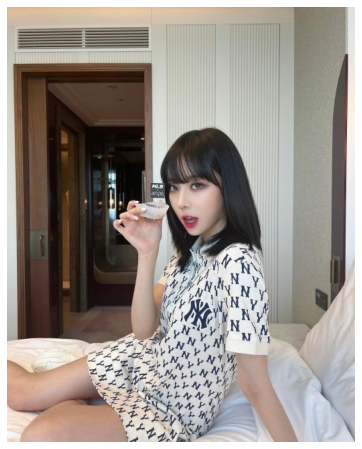

In [16]:
ls_img = [cv2.imread(img) for img in path_img]

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(ls_img[0], cv2.COLOR_BGR2RGB))
plt.axis(False)
plt.show()

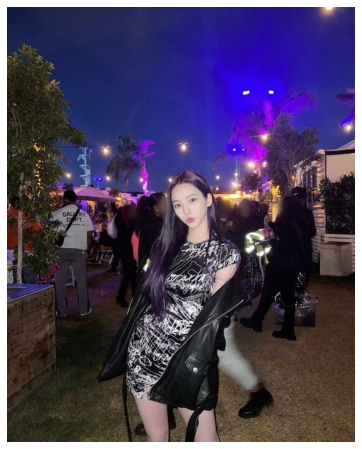

In [17]:
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(ls_img[1], cv2.COLOR_BGR2RGB))
plt.axis(False)
plt.show()

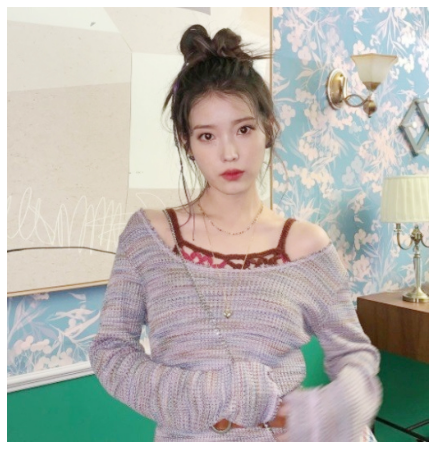

In [18]:
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(ls_img[2], cv2.COLOR_BGR2RGB))
plt.axis(False)
plt.show()

## Downloading Model

In [19]:
# Download Model from url
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f230a9cf610>)

In [20]:
# Take a pre-trained Model 
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

## Segmentation

In [21]:
segvalues, output = [], []

for img in path_img:
     tmp = model.segmentAsPascalvoc(img)
     segvalues.append(tmp[0])
     output.append(tmp[1])

In [22]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

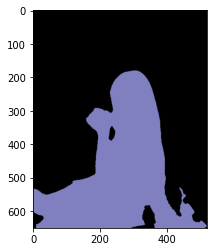

In [23]:
plt.imshow(output[0])
plt.show()

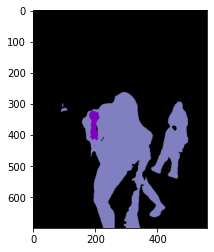

In [24]:
plt.imshow(output[1])
plt.show()

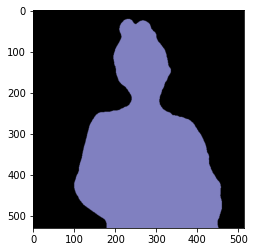

In [25]:
plt.imshow(output[2])
plt.show()

In [26]:
segvalues[0]

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [27]:
# Pixel in Detected Objects is True
segvalues[0]['masks'].sum(axis=1)[500: ]

array([237, 241, 245, 249, 250, 256, 266, 274, 274, 277, 278, 278, 278,
       278, 278, 278, 279, 282, 281, 282, 283, 286, 289, 290, 291, 292,
       293, 293, 296, 302, 305, 312, 313, 320, 331, 336, 338, 339, 345,
       348, 352, 352, 357, 364, 368, 374, 377, 382, 391, 405, 409, 408,
       408, 409, 411, 412, 410, 412, 411, 410, 409, 409, 407, 406, 407,
       406, 406, 406, 407, 409, 409, 411, 411, 414, 414, 415, 422, 430,
       435, 436, 437, 441, 439, 431, 431, 431, 430, 435, 433, 435, 435,
       436, 438, 439, 441, 442, 443, 443, 443, 442, 443, 442, 441, 442,
       440, 434, 429, 424, 424, 418, 415, 414, 406, 407, 407, 410, 410,
       410, 411, 410, 410, 410, 410, 412, 413, 417, 419, 420, 427, 434,
       440, 441, 453, 457, 464, 466, 470, 474, 484, 485, 482, 482, 479,
       468, 460, 456, 456, 447, 441, 437])

In [28]:
for yo, seg in zip(ls, segvalues):
    print(yo)
    print('--------------')
    for class_id in seg['class_ids']:
        print(LABEL_NAMES[class_id], ":", class_id)
    print()

winter
--------------
background : 0
person : 15

karina
--------------
background : 0
horse : 13
person : 15

iu
--------------
background : 0
person : 15



In [29]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [30]:
colormap[15]

array([192, 128, 128])

In [31]:
# person color
seg_color = (128, 128, 192)

(650, 520)


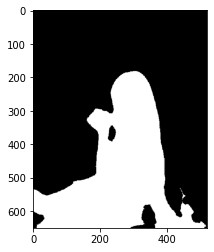

In [32]:
seg_map_winter = np.all(output[0]==seg_color, axis=-1)
print(seg_map_winter.shape)
plt.imshow(seg_map_winter, cmap='gray')
plt.show()

(700, 560)


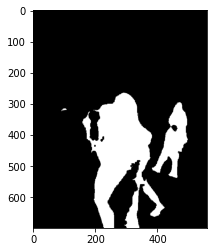

In [33]:
seg_map_karina = np.all(output[1]==seg_color, axis=-1)
print(seg_map_karina.shape)
plt.imshow(seg_map_karina, cmap='gray')
plt.show()

(530, 514)


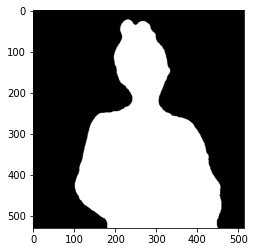

In [34]:
seg_map = np.all(output[2]==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

(530, 514)
(530, 514, 3)


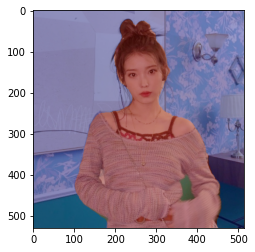

In [35]:
# it is tough work to take on segmentations of all images , do it one by one
# IU image

# Cause ls_img is list, Use Deepcopy
img_show = copy.deepcopy(ls_img)[2]
img_mask = seg_map.astype(np.uint8) * 255
print(img_mask.shape)
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
print(color_mask.shape)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## Blur

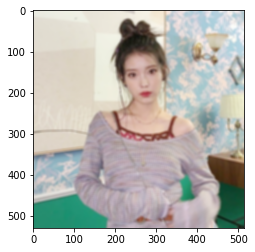

In [36]:
# Gaussian Blur
img_blur = cv2.GaussianBlur(ls_img[2], (7,7), cv2.BORDER_DEFAULT)  
plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
plt.show()

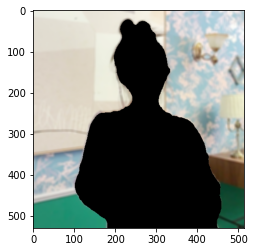

In [37]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# Extract BackGround
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_blur, img_bg_mask)

plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

## Result

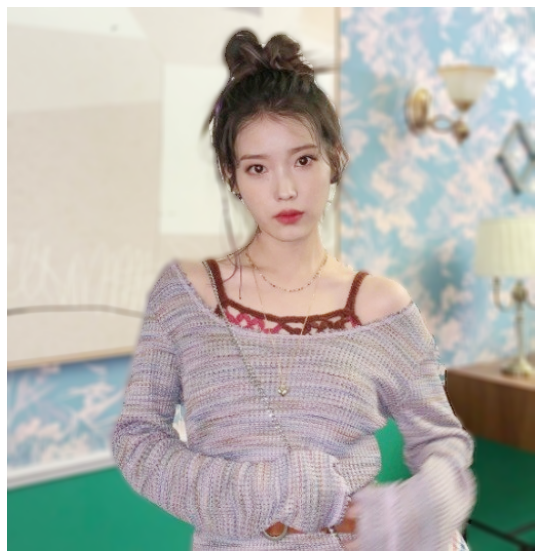

In [38]:
# 'img_mask_color==255' means a Person
img_concat = np.where(img_mask_color==255, ls_img[2], img_bg_blur)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.axis(False)
plt.show()

### IU

In [39]:
# 'img_mask_color==255' means a Person
img_concat = np.where(img_mask_color==255, ls_img[2], img_bg_blur)
iu = copy(img_concat)

fig, ax = plt.subplots(1, 2, figsize=(20, 20))
# shallow
ax[0].imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
ax[0].axis(False)
ax[0].set_title("Blured", size=20)

ax[1].imshow(cv2.cvtColor(ls_img[2], cv2.COLOR_BGR2RGB))
ax[1].axis(False)
plt.title("Original", size=20)
plt.show()

TypeError: 'module' object is not callable

### Winter

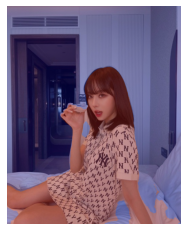

In [ ]:
# Winter image

# Cause ls_img is list, Use Deepcopy
img_show = copy.deepcopy(ls_img)[0]
img_mask = seg_map_winter.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis(False)
plt.show()

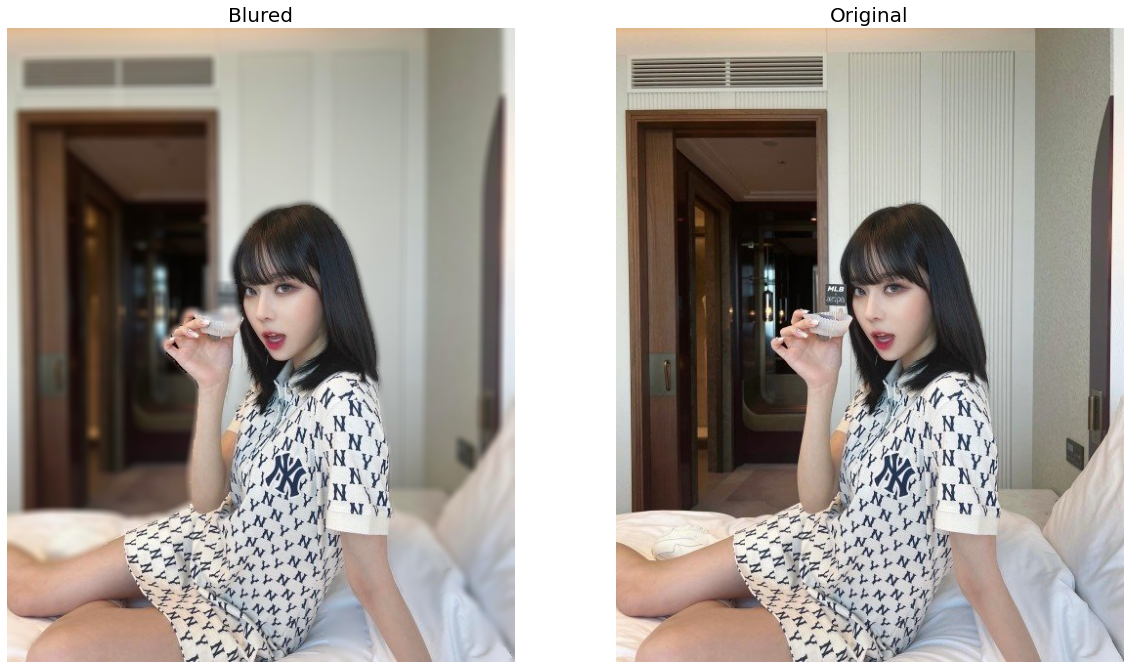

In [ ]:
# Gaussian Blur
img_blur = cv2.GaussianBlur(ls_img[0], (9,9), cv2.BORDER_DEFAULT)
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# Extract BackGround
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_blur, img_bg_mask)

# 'img_mask_color==255' means a Person
img_concat = np.where(img_mask_color==255, ls_img[0], img_bg_blur)
winter = copy(img_concat)

fig, ax = plt.subplots(1, 2, figsize=(20, 20))
# shallow
ax[0].imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
ax[0].axis(False)
ax[0].set_title("Blured", size=20)

ax[1].imshow(cv2.cvtColor(ls_img[0], cv2.COLOR_BGR2RGB))
ax[1].axis(False)
plt.title("Original", size=20)
plt.show()

### Karina

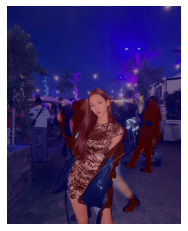

In [ ]:
# Winter image

# Cause ls_img is list, Use Deepcopy
img_show = copy.deepcopy(ls_img)[1]
img_mask = seg_map_karina.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis(False)
plt.show()

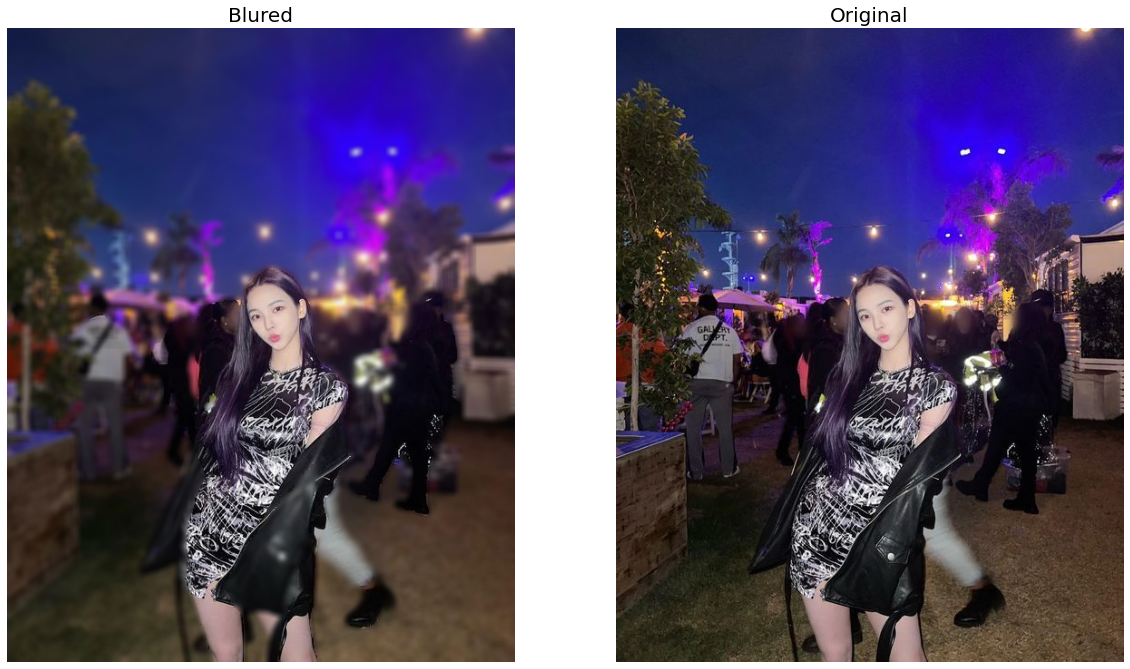

In [ ]:
# Gaussian Blur
img_blur = cv2.GaussianBlur(ls_img[1], (9,9), cv2.BORDER_DEFAULT)
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# Extract BackGround
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_blur, img_bg_mask)

# 'img_mask_color==255' means a Person
img_concat = np.where(img_mask_color==255, ls_img[1], img_bg_blur)
karina = copy(img_concat)

fig, ax = plt.subplots(1, 2, figsize=(20, 20))
# shallow
ax[0].imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
ax[0].axis(False)
ax[0].set_title("Blured", size=20)

ax[1].imshow(cv2.cvtColor(ls_img[1], cv2.COLOR_BGR2RGB))
ax[1].axis(False)
plt.title("Original", size=20)
plt.show()

### Chromakey

(720, 1280, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

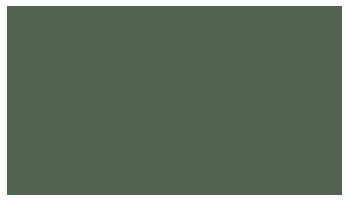

In [ ]:
bg = np.zeros(shape=(720, 1280, 3), dtype=np.uint8)
bg[:, :, 0] = 80
bg[:, :, 1] = 100
bg[:, :, 2] = 80

print(bg.shape)

plt.imshow(bg)
plt.axis(False)
plt.show

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)]("https://colab.research.google.com/drive/1Qku575UR6K_2rAjKxkqycHWyq4Ejggn7?usp=sharing")

## Issue

### IU

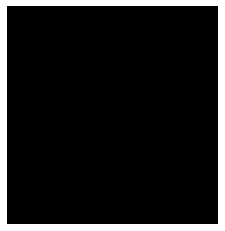

In [ ]:
bg = np.zeros_like(ls_img[2])

plt.imshow(bg)
plt.axis("off")
plt.show()

In [ ]:
seg_map = np.reshape(seg_map, (*seg_map.shape, 1))
seg_map.shape

(530, 514, 1)

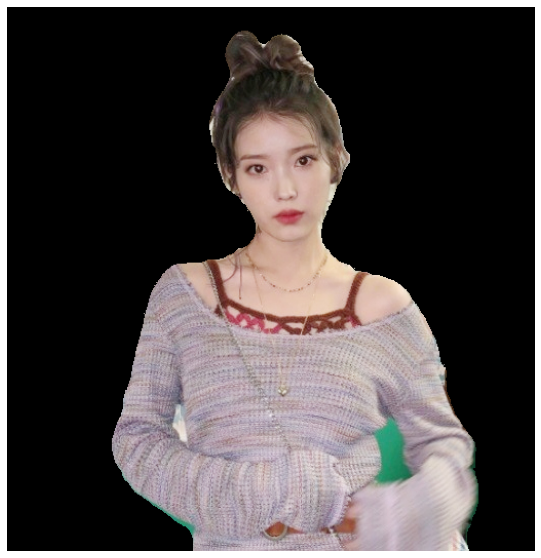

In [ ]:
issue = np.where(seg_map != False, ls_img[2], bg)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(issue, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [ ]:
path = '/aiffel/aiffel/Ex/Ex-10/issue_iu.png'
cv2.imwrite(path, issue)

True

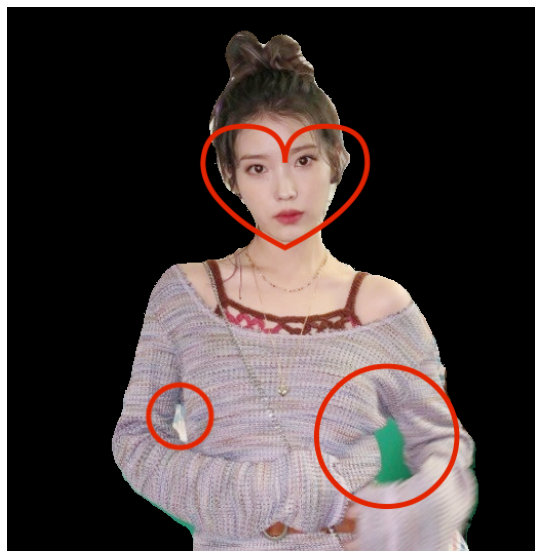

In [ ]:
path = '/aiffel/aiffel/Ex/Ex-10/issue_iu_edited.png'
issue = cv2.imread(path)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(issue, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

___

_가설_  
겨드랑이 부분이 백그라운드로 제대로 인식하지 못했고 원인은 이 공간이 완전히 둘러싸여있어 팔과 상체를 나눠주는 공간이라고 인식하지 못했다고 판단했다.

무엇보다 가장 큰 문제는 너무 이쁘다.

___

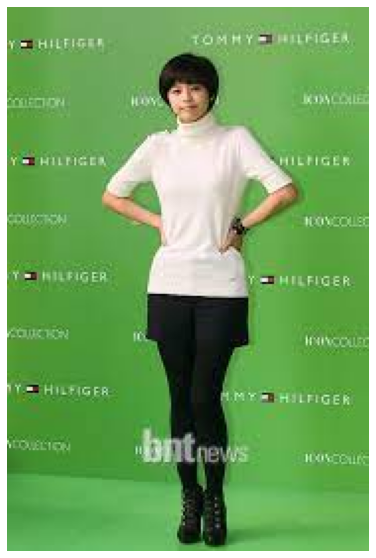

In [ ]:
path_test = '/aiffel/aiffel/Ex/Ex-10/img4.jpeg'
img4 = cv2.imread(path_test)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

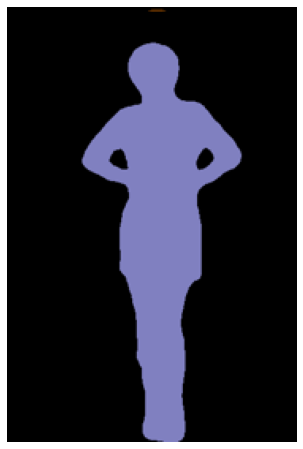

In [ ]:
_, output_test = model.segmentAsPascalvoc(path_test)

plt.figure(figsize=(8, 8))
plt.imshow(output_test)
plt.axis(False)
plt.show()

___
원인의 가설을 증명하기 위해서 겨드랑이 부분이 분명하게 나눠진 사진을 가져왔더니 모델이 정확히 인식했다.  
둘러싸여 있는 부분을 인체공학적으로 설명할 수 없다 생각하여 모델이 구분하지 못했다고 생각했지만 이는 틀렸음을 보여주고 있다.  

Edge Cascade를 이용해 아이유사진의 경계를 그려보아서 다른 관점으로 보려고 했다.  
그러나 밑의 사진들로 확인할 수 있듯이 경계가 명확하다.  
<font size=3 color='red'> 다른 기술을 접목시키는 것이 불가피하는 것으로 보인다.  </font>
___

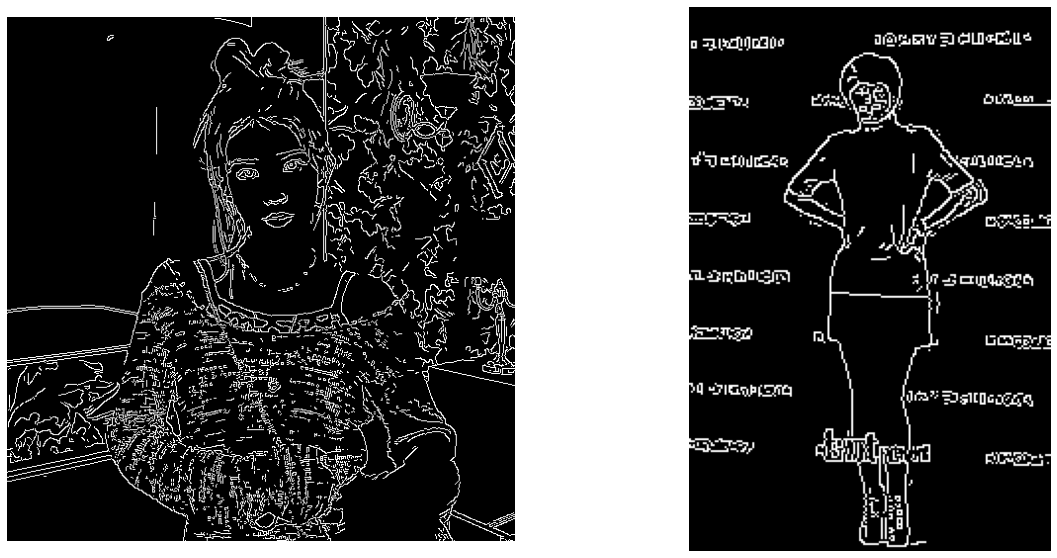

In [ ]:
img_iu = cv2.Canny(ls_img[2], 120, 175)
img4_ = cv2.Canny(img4, 120, 175)


fig, ax = plt.subplots(1, 2, figsize=(20,10))

ax[0].imshow(cv2.cvtColor(img_iu, cv2.COLOR_BGR2RGB))
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(img4_, cv2.COLOR_BGR2RGB))
ax[1].axis("off")
plt.show()

# 회고


## 내용 정리
<img src='https://velog.velcdn.com/images/jujemu/post/5c20c361-610f-4b03-84f8-03816f8ce185/image.png' width=400> </img>

# Portrait
## Outline
하나의 카메라로 인물사진을 찍어보자

인물사진 : 인물에 초점을 맞추어 배경이 흐린 것이 특징

1. Image Segmentation --> 인물과 배경 분리
2. Blur --> 배경을 흐리게
3. Composite --> Blur처리된 배경과 인물 합성

## Image Segmentation
이미지에서 Target Class마다 모든 픽셀을 Label하는 것. 
Class 분류에 공유하고 있는 특성있는 점을 이용한다.

### Semantic Segmentation
픽셀을 사람, 자동차와 같이 분류하는 것

### Sementation Model

DeepLab v3+

https://blog.lunit.io/2018/07/02/deeplab-v3-encoder-decoder-with-atrous-separable-convolution-for-semantic-image-segmentation/

___keyword : Atrous Convolution, Depthwise Separable Convolution___

### PixelLib github
https://github.com/ayoolaolafenwa/PixelLib
```
url_model = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
```

## Module
```
import urllib
from pixellib.semantic import semantic_segmentation
```

_urllib : url을 통해 데이터 다운_
_pixellib : semantic segmentation model: DeepLab v3+ 사용_

## Load pre-trained Model
학습된 모델을 사용한다.
```
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
urllib.request.urlretrieve(model_url, model_file)
```

## Segmentation
```
# load Model
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

# segvalues is a dictionary which has class model found
# output is an image seperated
segvalues, output = model.segmentAsPascalvoc(img_path)
```
## Composite
```
img_concat = np.where(img_mask_color==255, ls, img_bg_blur)
```

### Data Set for train
http://host.robots.ox.ac.uk/pascal/VOC/
```
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
```

# Reference

https://github.com/jujemu/EXP_local/blob/master/EX/Ex-10/%5BEx-10%5DPortrait.ipynb

winter : https://www.instagram.com/winter.aespa/  
Karina : https://www.instagram.com/karinah.aespa/  
IU : https://www.instagram.com/dlwlrma/  

## 루브릭

### 1. 인물모드 #성공적

### 2. 문제점

### 3. 솔루션

In [41]:
a = os.getenv("HOME") + '/aiffel/Ex/Ex-10/video.mp4'

In [43]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open(a,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)